# Problem Statement:

Investing in Flats is the biggest investment for most households in cities like Singapore which is very small but heavily urbanised. Therefore, being able to accurately value the flat prices will not only facilitate market transactions by providing valuable guidance for all market participants (be it home owners, home buyers, landlords, tenants or banks that underwrite mortgages), but also provide useful insights for policy makers and government authorities in understanding the current state of the economy.

## Attributes:

**month**:

**town**:

**flat_type**:

**block**:

**street_name**:

**storey_range**:

**floor_area_sqm**:

**flat_model**:

**lease_commence_date**:

**remaining_lease**:

**uniqueID**:

**resale_price**:

# Imports

In [1]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import pickle
import matplotlib.pyplot as plt
import missingno as msno
import graphviz
import seaborn as sns
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
# Import Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import Imputer

In [3]:
# Machine Learning Imports
from mlxtend.regressor import StackingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import pandas_profiling

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# For evaluating our ML results
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation Metric for Regression

## RMSE

In [4]:
def rmse(y,y_pred):
    rmse = sqrt(mean_squared_error(y,y_pred))
    return rmse

## MAPE

In [5]:
def mape(y, y_pred): 
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100

## RMSLE

In [6]:
def rmsle(y, y_pred) :
    assert len(y) == len(y_pred)
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y))**2))

# Reading Data

In [7]:
df = pd.read_csv('test.csv')
df.sample(5)
#df = df.replace('?', np.nan)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,uniqueID
7920,2018-12,ANG MO KIO,3 ROOM,463,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,60 years 02 months,229854
12818,2019-03,HOUGANG,4 ROOM,985A,BUANGKOK CRES,01 TO 03,85.0,Model A2,2004,84 years,234752
17294,2019-05,SENGKANG,EXECUTIVE,302D,ANCHORVALE LINK,10 TO 12,130.0,Apartment,2001,81 years 06 months,239228
4446,2018-10,BUKIT MERAH,5 ROOM,53,TELOK BLANGAH DR,01 TO 03,120.0,Standard,1978,58 years 03 months,226380
5881,2018-10,WOODLANDS,EXECUTIVE,788,WOODLANDS AVE 6,10 TO 12,141.0,Maisonette,1997,77 years 11 months,227815


In [8]:
df.shape

(21846, 11)

In [9]:
df.columns.tolist()

['month',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date',
 'remaining_lease',
 'uniqueID']

# Exploring Data

## Dropping Remaining Lease 

In [10]:
df_i=df.copy()

In [11]:
df.drop(['remaining_lease','uniqueID'],axis=1,inplace=True)

In [12]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
dtype: int64

In [13]:
#dftest=pd.read_csv("test.csv")

In [14]:
#df.columns

In [15]:
#dftest.columns

In [16]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
dtype: object

In [17]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date
0,2018-08,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1977
1,2018-08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977
2,2018-08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977
3,2018-08,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979
4,2018-08,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979


## Check number of unique values in columns

In [18]:
df.apply(lambda x: len(x.unique()))

month                    12
town                     26
flat_type                 7
block                  2193
street_name             532
storey_range             17
floor_area_sqm          146
flat_model               19
lease_commence_date      51
dtype: int64

## Value Counts in Columns

In [19]:
for c in df.columns:
    print("---- %s ---" %c)
    print(df[c].value_counts())

---- month ---
2019-07    2123
2019-05    2074
2018-08    2067
2018-10    1993
2018-09    1985
2019-04    1916
2019-06    1890
2018-11    1866
2019-03    1653
2019-01    1550
2018-12    1424
2019-02    1305
Name: month, dtype: int64
---- town ---
WOODLANDS          1802
JURONG WEST        1701
SENGKANG           1682
YISHUN             1522
TAMPINES           1325
PUNGGOL            1302
BEDOK              1157
HOUGANG             991
ANG MO KIO          977
CHOA CHU KANG       936
BUKIT BATOK         921
BUKIT MERAH         886
BUKIT PANJANG       821
TOA PAYOH           674
SEMBAWANG           637
QUEENSTOWN          611
KALLANG/WHAMPOA     608
PASIR RIS           596
CLEMENTI            497
GEYLANG             493
JURONG EAST         480
SERANGOON           440
BISHAN              419
CENTRAL AREA        172
MARINE PARADE       131
BUKIT TIMAH          65
Name: town, dtype: int64
---- flat_type ---
4 ROOM              9106
5 ROOM              5384
3 ROOM              5336
EXECUTIVE 

## Visualization Check

### Storey by Resale Price

In [20]:
#setting style for seaborn for better viewability
sns.set(style="whitegrid", color_codes=True)

#set up for statistical analysis
np.random.seed(sum(map(ord, "categorical")))

In [21]:
# f,ax=plt.subplots(figsize=(15,5))

# sns.swarmplot(x='storey_range', y='resale_price', data=df);

In [22]:
# f,ax=plt.subplots(figsize=(15,5))

# g=sns.boxplot(x='storey_range', y='resale_price', data=df)
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

In [23]:
# f,ax=plt.subplots(figsize=(15,5))

# g=sns.stripplot(x='storey_range', y='resale_price', data=df)
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

In [24]:
# f,ax=plt.subplots(figsize=(15,5))

# g=sns.violinplot(x='storey_range', y='resale_price', data=df, inner="stick", palette="Set3");
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

In [25]:
# f,ax=plt.subplots(figsize=(15,5))

# g=sns.countplot(x='storey_range', data=df);
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

### Storey Range by Floor Area Sqm

In [26]:
# f,ax=plt.subplots(figsize=(15,5))

# sns.swarmplot(x='storey_range', y='floor_area_sqm', data=df);

In [27]:
# f,ax=plt.subplots(figsize=(15,5))

# g=sns.boxplot(x='storey_range', y='floor_area_sqm', data=df)
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

In [28]:
# f,ax=plt.subplots(figsize=(15,5))

# g=sns.stripplot(x='storey_range', y='floor_area_sqm', data=df)
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

In [29]:
# f,ax=plt.subplots(figsize=(15,5))

# g=sns.violinplot(x='storey_range', y='floor_area_sqm', data=df, inner="stick", palette="Set3");
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

# Feature Engineering

## Taking out Year and Month from Month Column

In [30]:
df["year"]=df["month"].str.split("-",expand=True)[0]

In [31]:
df["month"]=df["month"].str.split("-",expand=True)[1]

In [32]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year
0,08,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1977,2018
1,08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977,2018
2,08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977,2018
3,08,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,2018
4,08,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,2018


## Taking out Storey Range Col1 and Col2

In [33]:
df["storey_range_1"]=df["storey_range"].str.split("TO",expand=True)[0]

In [34]:
df["storey_range_2"]=df["storey_range"].str.split("TO",expand=True)[1]

In [35]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year,storey_range_1,storey_range_2
0,08,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1977,2018,01,03
1,08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977,2018,07,09
2,08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977,2018,07,09
3,08,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,2018,01,03
4,08,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,2018,01,03


In [36]:
df.drop("storey_range",axis=1,inplace=True)

In [37]:
df['town'].value_counts()

WOODLANDS          1802
JURONG WEST        1701
SENGKANG           1682
YISHUN             1522
TAMPINES           1325
PUNGGOL            1302
BEDOK              1157
HOUGANG             991
ANG MO KIO          977
CHOA CHU KANG       936
BUKIT BATOK         921
BUKIT MERAH         886
BUKIT PANJANG       821
TOA PAYOH           674
SEMBAWANG           637
QUEENSTOWN          611
KALLANG/WHAMPOA     608
PASIR RIS           596
CLEMENTI            497
GEYLANG             493
JURONG EAST         480
SERANGOON           440
BISHAN              419
CENTRAL AREA        172
MARINE PARADE       131
BUKIT TIMAH          65
Name: town, dtype: int64

In [38]:
low_pop=["CENTRAL AREA","MARINE PARADE","BUKIT TIMAH","BISHAN","SEMBAWANG","CLEMENTI","SERANGOON","JURONG EAST","QUEENSTOWN","GEYLANG","PUNGGOL"]
med_pop=["KALLANG/WHAMPOA","TOA PAYOH","PASIR RIS","BUKIT BATOK","BUKIT PANJANG","BUKIT MERAH","ANG MO KIO"]
high_pop=["CHOA CHU KANG","HOUGANG","SENGKANG","YISHUN","BEDOK","TAMPINES","WOODLANDS","JURONG WEST"]

In [39]:
city=["BISHAN","SEMBAWANG","CLEMENTI","SERANGOON","JURONG EAST","QUEENSTOWN","GEYLANG","PUNGGOL","KALLANG/WHAMPOA","TOA PAYOH","PASIR RIS","BUKIT BATOK","BUKIT PANJANG","BUKIT MERAH","ANG MO KIO","CHOA CHU KANG","HOUGANG","SENGKANG","YISHUN","BEDOK","TAMPINES","WOODLANDS","JURONG WEST"]

CENTRAL AREA,MARINE PARADE,BUKIT TIMAH 

In [40]:
d = {"CENTRAL AREA":0,"MARINE PARADE":1,"BUKIT TIMAH":2,"BISHAN":3,"SEMBAWANG":4,"CLEMENTI":5,"SERANGOON":6, "JURONG EAST":7,"QUEENSTOWN":8,"GEYLANG":9,"PUNGGOL":10,
    "KALLANG/WHAMPOA":11,"TOA PAYOH":12,"PASIR RIS":13,"BUKIT BATOK":14,"BUKIT PANJANG":15,"BUKIT MERAH":16,"ANG MO KIO":17,
    "CHOA CHU KANG":18,"HOUGANG":19,"SENGKANG":20,"YISHUN":21,"BEDOK":22,"TAMPINES":23,"WOODLANDS":24,"JURONG WEST":24}

In [41]:
df['pop_check'] = df['town'].map(d)

In [42]:
def pop_check(row):
    if(row>=0 and row<=11):
        return 'low population'
    elif(row>=12 and row<=17):
        return 'medium population'
    else:
        return 'high population'

df['pop_check']=df['pop_check'].apply(pop_check)

In [43]:
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,year,storey_range_1,storey_range_2,pop_check
0,08,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,44.0,Improved,1977,2018,01,03,medium population
1,08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,82.0,New Generation,1977,2018,07,09,medium population
2,08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,67.0,New Generation,1977,2018,07,09,medium population
3,08,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,67.0,New Generation,1979,2018,01,03,medium population
4,08,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,67.0,New Generation,1979,2018,01,03,medium population


In [44]:
df['pop_check'].unique()

array(['medium population', 'high population', 'low population'],
      dtype=object)

In [45]:
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,year,storey_range_1,storey_range_2,pop_check
0,08,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,44.0,Improved,1977,2018,01,03,medium population
1,08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,82.0,New Generation,1977,2018,07,09,medium population
2,08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,67.0,New Generation,1977,2018,07,09,medium population
3,08,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,67.0,New Generation,1979,2018,01,03,medium population
4,08,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,67.0,New Generation,1979,2018,01,03,medium population


In [46]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
year                    object
storey_range_1          object
storey_range_2          object
pop_check               object
dtype: object

In [47]:
col_o = df.select_dtypes(include=['object']).columns.tolist()

In [48]:
col_o

['month',
 'town',
 'flat_type',
 'block',
 'street_name',
 'flat_model',
 'year',
 'storey_range_1',
 'storey_range_2',
 'pop_check']

In [49]:
df[col_o]=df[col_o].astype('category')

In [50]:
df.dtypes

month                  category
town                   category
flat_type              category
block                  category
street_name            category
floor_area_sqm          float64
flat_model             category
lease_commence_date       int64
year                   category
storey_range_1         category
storey_range_2         category
pop_check              category
dtype: object

In [51]:
col_my=["month","year"]

In [52]:
df[col_my]=df[col_my].astype('int64')

In [53]:
df.dtypes

month                     int64
town                   category
flat_type              category
block                  category
street_name            category
floor_area_sqm          float64
flat_model             category
lease_commence_date       int64
year                      int64
storey_range_1         category
storey_range_2         category
pop_check              category
dtype: object

In [54]:
# df.drop('population',axis=1,inplace=True)

# Data Visualization

In [55]:
sns.set_context("poster")

## Wide form Check

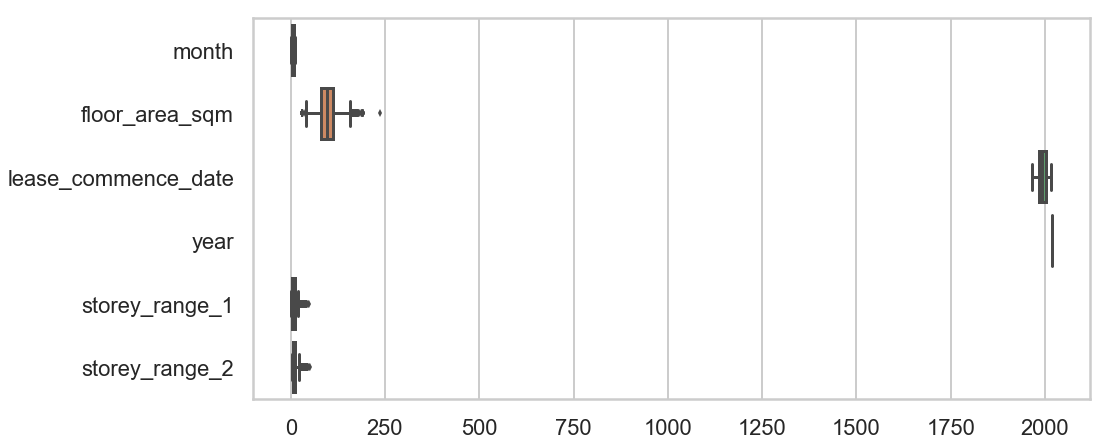

In [56]:
f,ax=plt.subplots(figsize=(15,7))

sns.boxplot(data=df, orient="h");

## Count of Flat Model

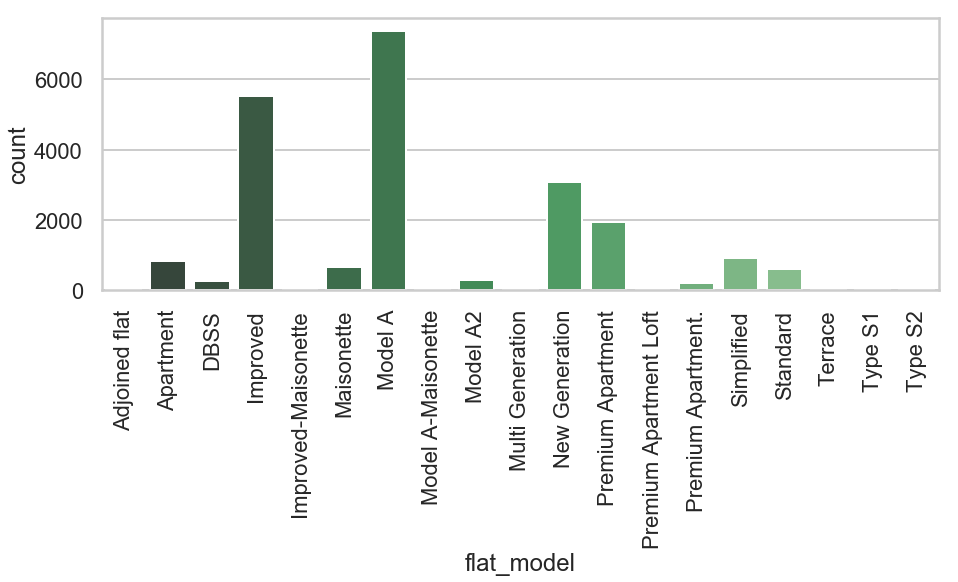

In [57]:
f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='flat_model', data=df, palette="Greens_d")
plt.xticks(rotation=90);

## Count of Flat Types

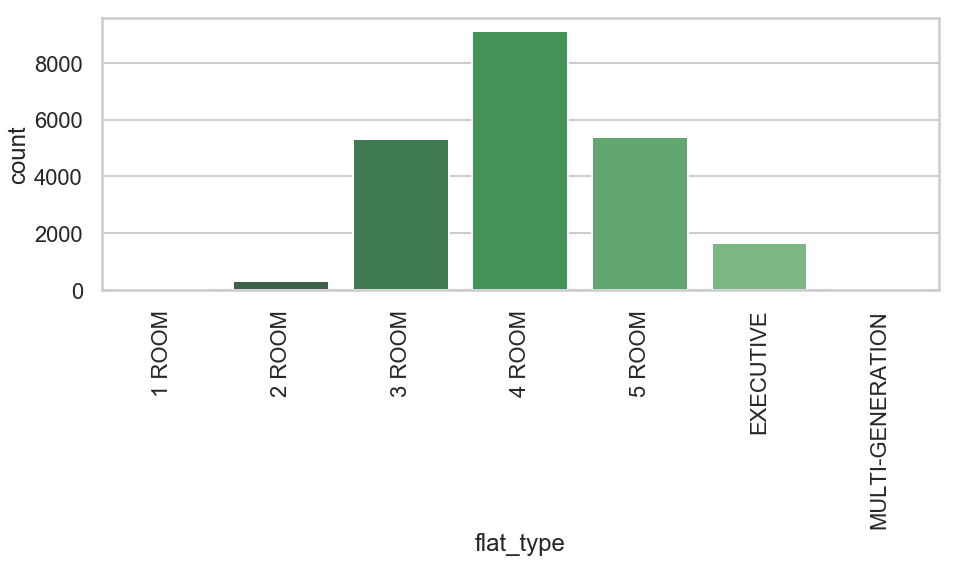

In [58]:
f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='flat_type', data=df, palette="Greens_d")
plt.xticks(rotation=90);

## Count of Sales by Year

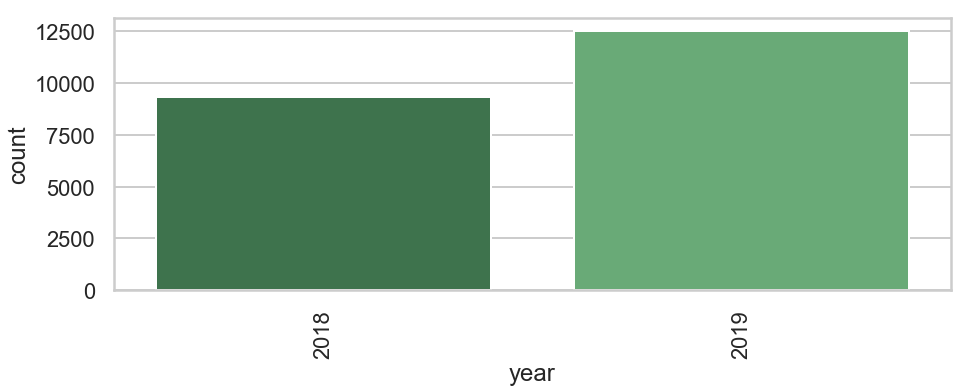

In [59]:
f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='year', data=df, palette="Greens_d")
plt.xticks(rotation=90);

## Count of Sales by Month

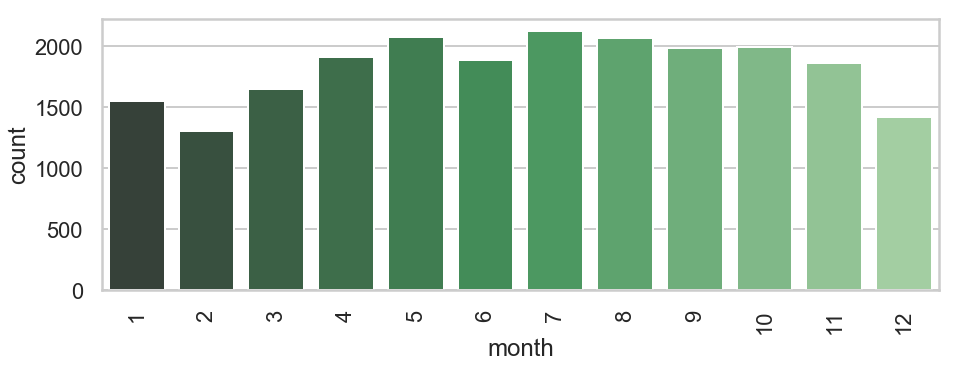

In [60]:
f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='month', data=df, palette="Greens_d")
plt.xticks(rotation=90);

## Dubious Visualization

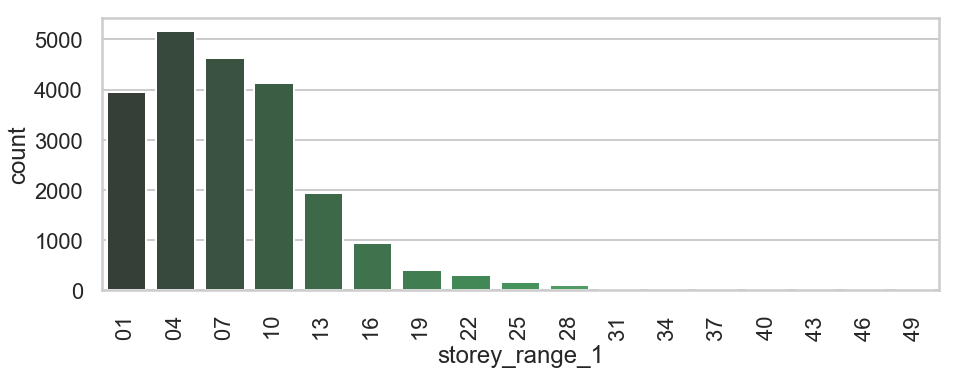

In [61]:
## Count of Sales by Year

f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='storey_range_1', data=df, palette="Greens_d")
plt.xticks(rotation=90);

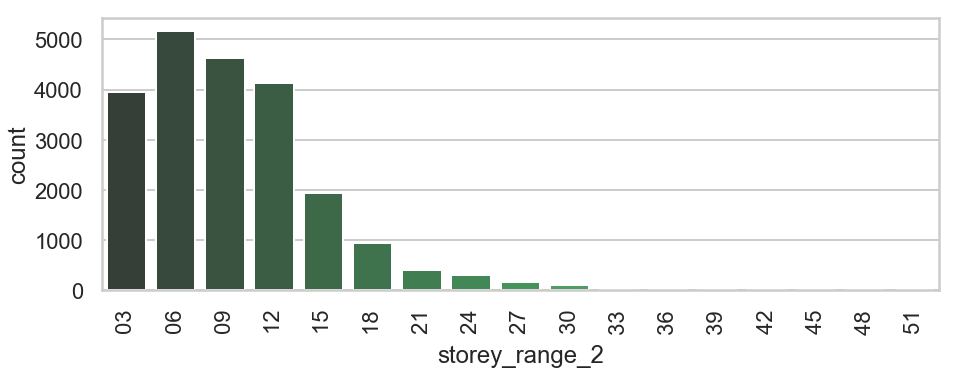

In [62]:
## Count of Sales by Year

f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='storey_range_2', data=df, palette="Greens_d")
plt.xticks(rotation=90);

## Count of Towns in the Dataset

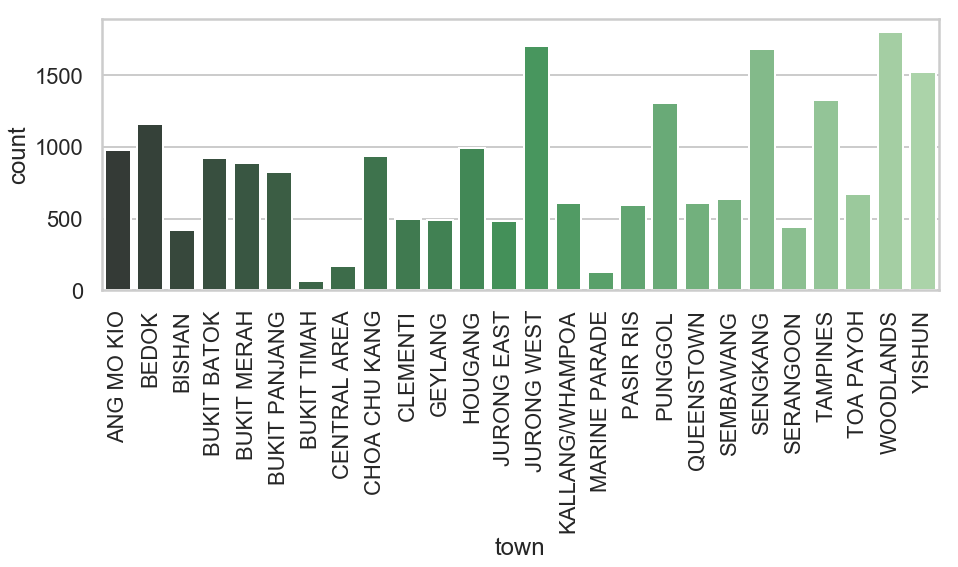

In [63]:
f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='town', data=df, palette="Greens_d")
plt.xticks(rotation=90);

## Population Wise Resale Price

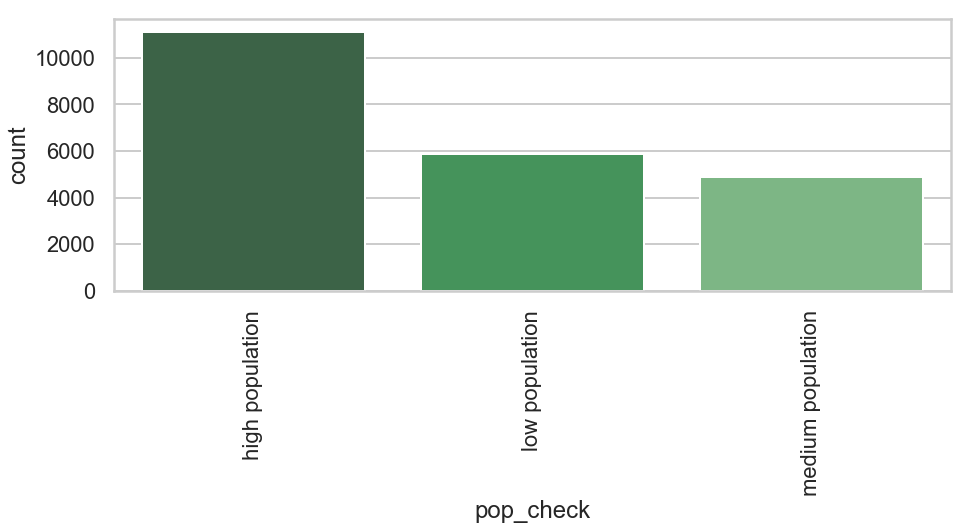

In [64]:
f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='pop_check', data=df, palette="Greens_d")
plt.xticks(rotation=90);

## CrossTab

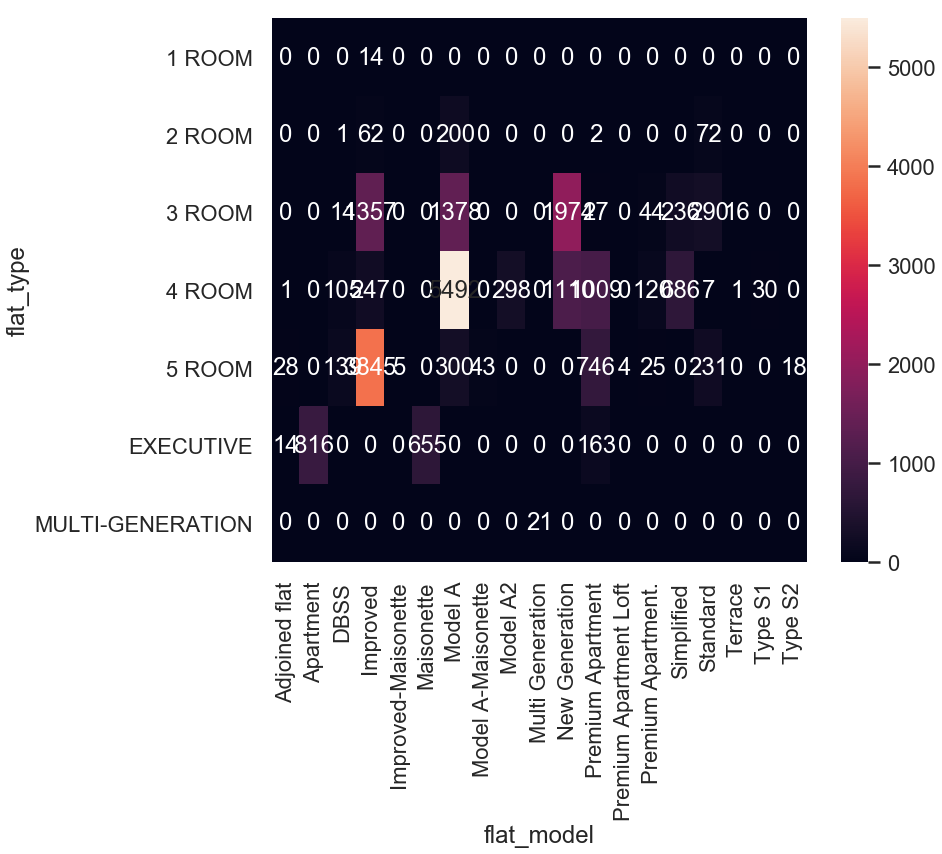

In [65]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pd.crosstab(df['flat_type'], df['flat_model']),annot=True,fmt='d');

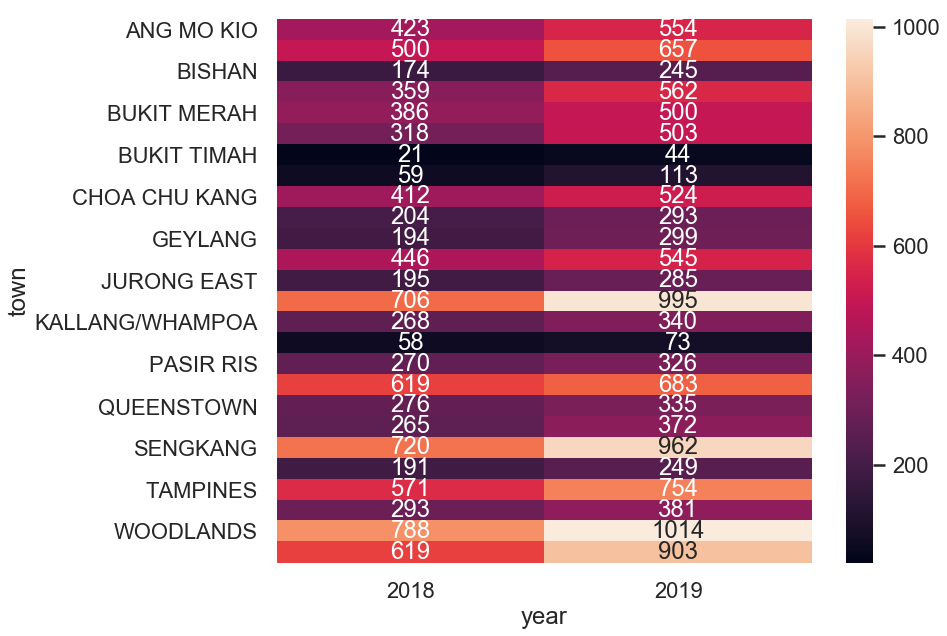

In [66]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pd.crosstab(df['town'], df['year']),annot=True,fmt='d');

## YearWise Resale Price by Flat Type

In [67]:
# fig, ax = plt.subplots(figsize=(12, 10))
# sns.pointplot(x='year', y='resale_price', data=df,hue="flat_type")
# plt.legend(bbox_to_anchor=(1,1));

##  YearWise Floor Area Square Metre by Flat Type

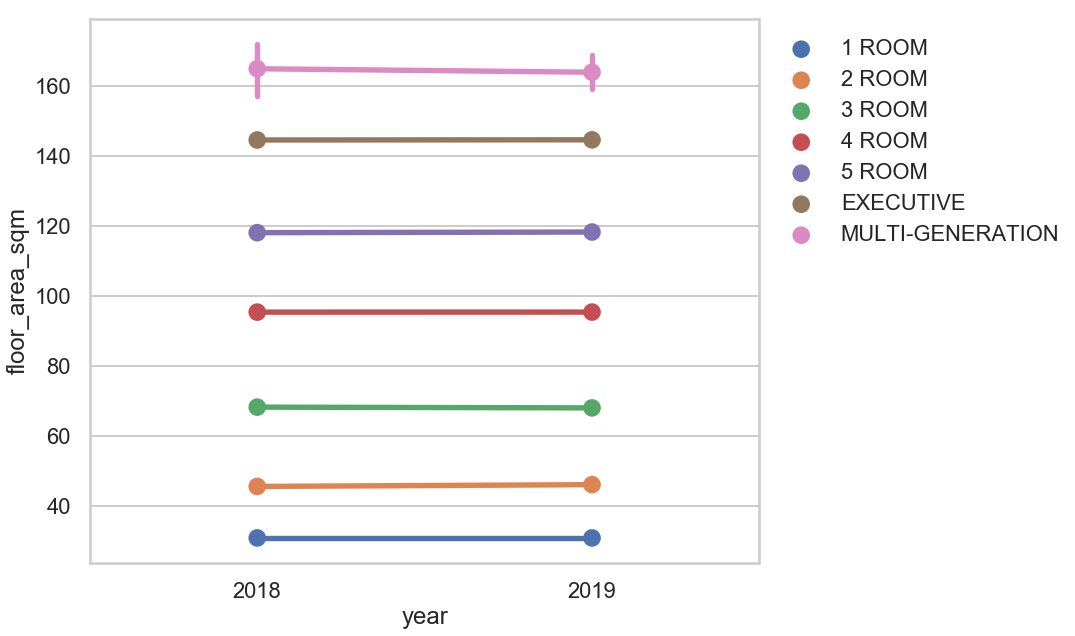

In [68]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.pointplot(x='year', y='floor_area_sqm', data=df,hue="flat_type")
plt.legend(bbox_to_anchor=(1,1));

## Floor Area Square Metre by Resale Price

In [69]:
# sns.regplot(x='floor_area_sqm', y='resale_price', data=df);

## Floor Area Square Metre by Resale Price with Means in more general terms

In [70]:
# #Collapsing the data points in each bin and plotting the central tendency
# sns.lmplot(x='floor_area_sqm', y='resale_price', data=df, x_estimator=np.mean);

In [71]:
# #Collapsing the data points in each bin and plotting the central tendency
# sns.lmplot(x='floor_area_sqm', y='resale_price', data=df, hue="flat_type");

In [72]:
# g=sns.FacetGrid(df,col="year",hue="pop_check",col_wrap=1,size=10, aspect=0.9)
# g.map(plt.scatter,"floor_area_sqm","resale_price",alpha=0.5)
# g.add_legend();

##  Flat Model by Population

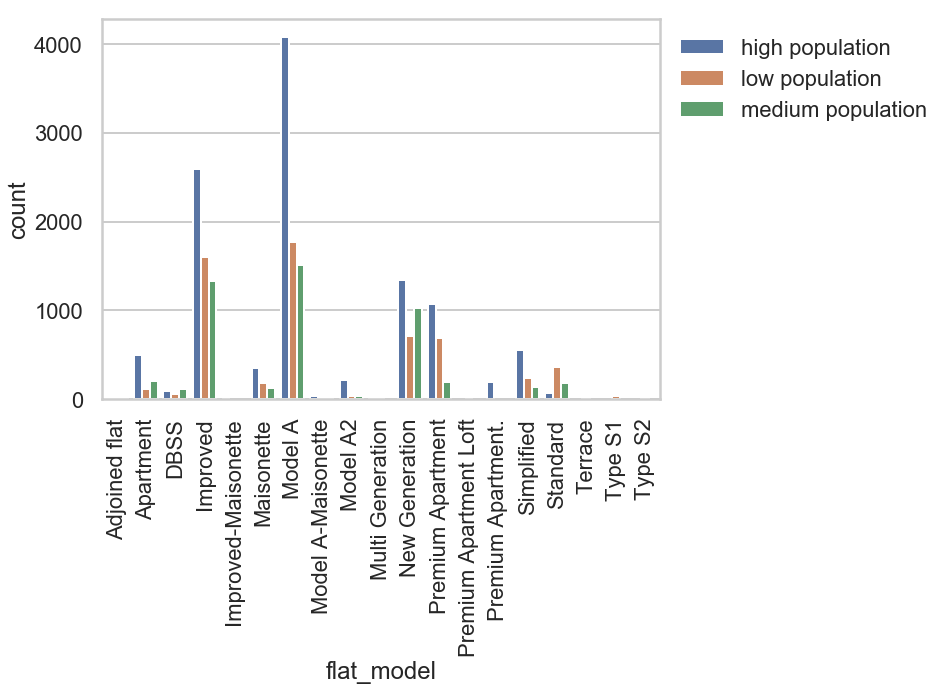

In [73]:
plt.figure(figsize=(10, 7))
sns.countplot(x='flat_model', data = df, hue = 'pop_check');
plt.legend(bbox_to_anchor=(1,1));
plt.xticks(rotation=90);

In [74]:
# g=sns.FacetGrid(df, col="pop_check", col_wrap=4)# colwrap if too many columns
# g.map(sns.barplot,"flat_type", "resale_price");
# g.set_axis_labels("flat_type", "resale_price");
# g.set_xticklabels(rotation=45);

## Corr Plot

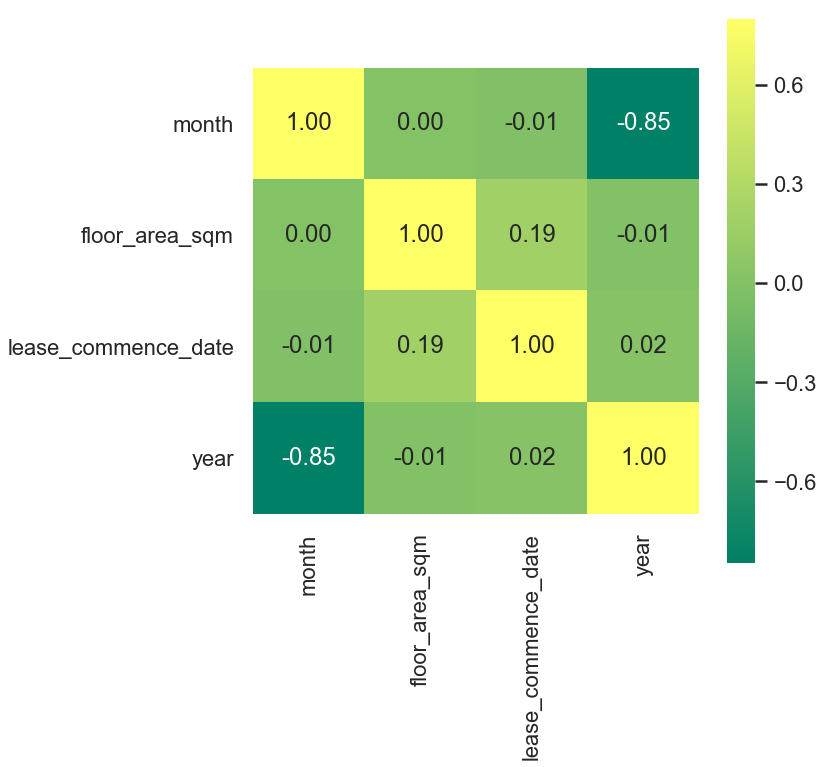

In [75]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer")#cmap ="winter"
plt.show();

In [76]:
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,year,storey_range_1,storey_range_2,pop_check
0,8,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,44.0,Improved,1977,2018,01,03,medium population
1,8,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,82.0,New Generation,1977,2018,07,09,medium population
2,8,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,67.0,New Generation,1977,2018,07,09,medium population
3,8,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,67.0,New Generation,1979,2018,01,03,medium population
4,8,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,67.0,New Generation,1979,2018,01,03,medium population


In [77]:
df.dtypes

month                     int64
town                   category
flat_type              category
block                  category
street_name            category
floor_area_sqm          float64
flat_model             category
lease_commence_date       int64
year                      int64
storey_range_1         category
storey_range_2         category
pop_check              category
dtype: object

In [78]:
df

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,year,storey_range_1,storey_range_2,pop_check
0,8,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,44.0,Improved,1977,2018,01,03,medium population
1,8,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,82.0,New Generation,1977,2018,07,09,medium population
2,8,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,67.0,New Generation,1977,2018,07,09,medium population
3,8,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,67.0,New Generation,1979,2018,01,03,medium population
4,8,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,67.0,New Generation,1979,2018,01,03,medium population
5,8,ANG MO KIO,3 ROOM,561,ANG MO KIO AVE 10,68.0,New Generation,1980,2018,07,09,medium population
6,8,ANG MO KIO,3 ROOM,542,ANG MO KIO AVE 10,68.0,New Generation,1981,2018,01,03,medium population
7,8,ANG MO KIO,3 ROOM,549,ANG MO KIO AVE 10,82.0,New Generation,1981,2018,07,09,medium population
8,8,ANG MO KIO,3 ROOM,550,ANG MO KIO AVE 10,68.0,New Generation,1981,2018,04,06,medium population
9,8,ANG MO KIO,3 ROOM,536,ANG MO KIO AVE 10,68.0,New Generation,1980,2018,04,06,medium population


# Preprocessing

In [79]:
X=df.copy()
#df.drop("resale_price",axis=1)
# y=df["resale_price"]

In [80]:
X.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,year,storey_range_1,storey_range_2,pop_check
0,8,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,44.0,Improved,1977,2018,01,03,medium population
1,8,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,82.0,New Generation,1977,2018,07,09,medium population
2,8,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,67.0,New Generation,1977,2018,07,09,medium population
3,8,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,67.0,New Generation,1979,2018,01,03,medium population
4,8,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,67.0,New Generation,1979,2018,01,03,medium population


In [81]:
labcols=["block","street_name","pop_check"]

In [82]:
ohecols=["flat_model","flat_type","lease_commence_date","month","town","year","storey_range_1","storey_range_2"]

## LabelEncoding

In [83]:
le=LabelEncoder()
X[labcols]=X[labcols].apply(LabelEncoder().fit_transform)

In [84]:
X.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,year,storey_range_1,storey_range_2,pop_check
0,8,ANG MO KIO,2 ROOM,783,14,44.0,Improved,1977,2018,01,03,2
1,8,ANG MO KIO,3 ROOM,398,11,82.0,New Generation,1977,2018,07,09,2
2,8,ANG MO KIO,3 ROOM,398,11,67.0,New Generation,1977,2018,07,09,2
3,8,ANG MO KIO,3 ROOM,1080,12,67.0,New Generation,1979,2018,01,03,2
4,8,ANG MO KIO,3 ROOM,1148,12,67.0,New Generation,1979,2018,01,03,2


## One Hot Encoding

In [85]:
X = pd.get_dummies(columns = ohecols, data = X, drop_first=True)

In [86]:
X.head()

,block,street_name,floor_area_sqm,pop_check,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,...,storey_range_2_ 24,storey_range_2_ 27,storey_range_2_ 30,storey_range_2_ 33,storey_range_2_ 36,storey_range_2_ 39,storey_range_2_ 42,storey_range_2_ 45,storey_range_2_ 48,storey_range_2_ 51
0,783,14,44.0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,398,11,82.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,398,11,67.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1080,12,67.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1148,12,67.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
X.shape

(21846, 147)

In [107]:
X_check= pd.read_pickle("X_train_test.pkl")

In [108]:
X_check.shape

(121934, 146)

In [109]:
X.columns.tolist()

['block',
 'street_name',
 'floor_area_sqm',
 'pop_check',
 'flat_model_Apartment',
 'flat_model_DBSS',
 'flat_model_Improved',
 'flat_model_Improved-Maisonette',
 'flat_model_Maisonette',
 'flat_model_Model A',
 'flat_model_Model A-Maisonette',
 'flat_model_Model A2',
 'flat_model_Multi Generation',
 'flat_model_New Generation',
 'flat_model_Premium Apartment',
 'flat_model_Premium Apartment Loft',
 'flat_model_Premium Apartment.',
 'flat_model_Simplified',
 'flat_model_Standard',
 'flat_model_Terrace',
 'flat_model_Type S1',
 'flat_model_Type S2',
 'flat_type_2 ROOM',
 'flat_type_3 ROOM',
 'flat_type_4 ROOM',
 'flat_type_5 ROOM',
 'flat_type_EXECUTIVE',
 'flat_type_MULTI-GENERATION',
 'lease_commence_date_1967',
 'lease_commence_date_1968',
 'lease_commence_date_1969',
 'lease_commence_date_1970',
 'lease_commence_date_1971',
 'lease_commence_date_1972',
 'lease_commence_date_1973',
 'lease_commence_date_1974',
 'lease_commence_date_1975',
 'lease_commence_date_1976',
 'lease_commenc

In [110]:
X_check.columns.tolist()

['block',
 'floor_area_sqm',
 'street_name',
 'pop_check',
 'flat_model_Apartment',
 'flat_model_DBSS',
 'flat_model_Improved',
 'flat_model_Improved-Maisonette',
 'flat_model_Maisonette',
 'flat_model_Model A',
 'flat_model_Model A-Maisonette',
 'flat_model_Model A2',
 'flat_model_Multi Generation',
 'flat_model_New Generation',
 'flat_model_Premium Apartment',
 'flat_model_Premium Apartment Loft',
 'flat_model_Premium Apartment.',
 'flat_model_Simplified',
 'flat_model_Standard',
 'flat_model_Terrace',
 'flat_model_Type S1',
 'flat_model_Type S2',
 'flat_type_2 ROOM',
 'flat_type_3 ROOM',
 'flat_type_4 ROOM',
 'flat_type_5 ROOM',
 'flat_type_EXECUTIVE',
 'flat_type_MULTI-GENERATION',
 'lease_commence_date_1967',
 'lease_commence_date_1968',
 'lease_commence_date_1969',
 'lease_commence_date_1970',
 'lease_commence_date_1971',
 'lease_commence_date_1972',
 'lease_commence_date_1973',
 'lease_commence_date_1974',
 'lease_commence_date_1975',
 'lease_commence_date_1976',
 'lease_commenc

In [120]:
abc_check=[]
for i in X_check.columns.tolist():
    #print(i)
    if i in X.columns.tolist():
        #print(i)
        abc_check.append(i) 

In [122]:
len(abc_check)

146

In [95]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Modeling

## Linear Regression

In [96]:
ls

 Volume in drive D is Data
 Volume Serial Number is 8624-2902

 Directory of D:\Downloads\Chrome\Insofe Data Science\Mith

14-09-2019  17:16    <DIR>          .
14-09-2019  17:16    <DIR>          ..
14-09-2019  15:19    <DIR>          .ipynb_checkpoints
14-09-2019  09:02           130,459 20190914_MiTH_Regression_ML-1568365420116.pdf
14-09-2019  09:04        12,680,209 building_to_mrt_distance.csv
14-09-2019  16:19        11,545,584 dt_s_model.pkl
14-09-2019  16:15             1,943 elasticnet_model.pkl
14-09-2019  16:16       270,027,943 knn_model.pkl
14-09-2019  16:53             8,727 lars_model.pkl
14-09-2019  16:12             1,944 lasso_model.pkl
14-09-2019  17:15             2,854 lr_model.pkl
14-09-2019  17:16         1,191,292 Predict House Price Regression Test.ipynb
14-09-2019  17:15         6,978,670 Predict House Price Regression Train .ipynb
14-09-2019  15:18         6,188,779 Predict House Price Regression Train -Copy1.ipynb
14-09-2019  16:13             1,808 ridge_mo

In [ ]:
# # Fitting Linear Regression to the Training set
# lr= LinearRegression()
# lr.fit(X_train,y_train)

In [97]:
# # Save to file 
# pkl_filename = "lr_model.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(lr, file)
# Load from file
with open("lr_model.pkl", 'rb') as file:
    lr = pickle.load(file)

In [98]:
X.shape

(21846, 147)

In [123]:
# Predicting the Train and Test set results
# y_pred_lr_train= lr.predict(X_train)
y_pred_lr_test= lr.predict(X[abc_check])

In [ ]:
# predictors = X_train.columns
# coef = pd.Series(lr.coef_, predictors).sort_values()
# print(coef)

In [ ]:
# #Score of Prediction
# lr_r2score_train = lr.score(X_train,y_train)
# print("Train Prediction R2 Score",lr_r2score_train*100)
# lr_r2score_test = r2_score(y_test,y_pred_lr_test)
# print("Test Prediction R2 Score",lr_r2score_test*100)

# lr_score_train_rmse = rmse(y_train,y_pred_lr_train)
# print("Train Prediction RMSE Score",lr_score_train_rmse)
# lr_score_test_rmse = rmse(y_test,y_pred_lr_test)
# print("Test Prediction RMSE Score",lr_score_test_rmse)

# lr_score_train_mape = mape(y_train,y_pred_lr_train)
# print("Train Prediction MAPE Score",lr_score_train_mape)
# lr_score_test_mape = mape(y_test,y_pred_lr_test)
# print("Test Prediction MAPE Score",lr_score_test_mape)

# lr_score_train_rmsle = rmsle(y_train,y_pred_lr_train)
# print("Train Prediction RMSLE Score",lr_score_train_rmsle)
# lr_score_test_rmsle = rmsle(y_test,y_pred_lr_test)
# print("Test Prediction RMSLE Score",lr_score_test_rmsle)

### Train Actual vs Prediction Plot

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.scatterplot(x =y_train, y = y_pred_lr_train);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.residplot(x = y_train, y = y_pred_lr_train);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.distplot(y_train-y_pred_lr_train);

### Test Actual vs Prediction Plot

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.scatterplot(x = y_test, y = y_pred_lr_test);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.residplot(x = y_test, y = y_pred_lr_test);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.distplot(y_test-y_pred_lr_test);

In [124]:
df_i['uniqueID'].head()

0    221934
1    221935
2    221936
3    221937
4    221938
Name: uniqueID, dtype: int64

In [125]:
lr_pred_actual = pd.DataFrame({ 'index': df_i['uniqueID'],'predicted': np.round(y_pred_lr_test,2)})

lr_pred_actual.head(10)

,index,predicted
0,221934,230136.55
1,221935,406474.29
2,221936,359391.56
3,221937,327533.63
4,221938,326865.54
5,221939,341124.97
6,221940,324268.09
7,221941,385847.07
8,221942,331817.90
9,221943,331393.37


In [126]:
lr_pred_actual.to_csv('LRpred.csv', index=False)

## Lasso Regression

In [ ]:
# # Fitting Lasso Regression to the Training set
# lasso_reg = Lasso()
# param_grid = {'alpha':np.logspace(-15,2,10)}
# lasso = RandomizedSearchCV(lasso_reg,param_grid,scoring="neg_mean_squared_error",cv=5,refit=True)
# lasso.fit(X_train,y_train)

In [ ]:
# lasso=Lasso(alpha=0.0001)
# lasso.fit(X_train,y_train)

In [ ]:
# print(lasso.best_params_)
# print(lasso.best_score_)

In [ ]:
# # Save to file 
# pkl_filename = "lasso_model.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(lasso, file)
# Load from file
with open("lasso_model.pkl", 'rb') as file:
    pickle_model = pickle.load(file)

In [ ]:
# # Predicting the Train and Test set results
# y_pred_lasso_train= lasso.predict(X_train)
y_pred_lasso_test= lasso.predict(X)

In [ ]:
# #Score of Prediction
# lasso_r2score_train = lasso.score(X_train,y_train)
# print("Train Prediction R2 Score",lasso_r2score_train*100)
# lasso_r2score_test = r2_score(y_test,y_pred_lasso_test)
# print("Test Prediction R2 Score",lasso_r2score_test*100)

# lasso_score_train_rmse = rmse(y_train,y_pred_lasso_train)
# print("Train Prediction RMSE Score",lasso_score_train_rmse)
# lasso_score_test_rmse = rmse(y_test,y_pred_lasso_test)
# print("Test Prediction RMSE Score",lasso_score_test_rmse)

# lasso_score_train_mape = mape(y_train,y_pred_lasso_train)
# print("Train Prediction MAPE Score",lasso_score_train_mape)
# lasso_score_test_mape = mape(y_test,y_pred_lasso_test)
# print("Test Prediction MAPE Score",lasso_score_test_mape)

# lasso_score_train_rmsle = rmsle(y_train,y_pred_lasso_train)
# print("Train Prediction RMSLE Score",lasso_score_train_rmsle)
# lasso_score_test_rmsle = rmsle(y_test,y_pred_lasso_test)
# print("Test Prediction RMSLE Score",lasso_score_test_rmsle)

### Train Actual vs Prediction Plot

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.scatterplot(x = y_train, y = y_pred_lasso_train);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.residplot(x = y_train, y = y_pred_lasso_train);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.distplot(y_train-y_pred_lasso_train);

### Test Actual vs Prediction Plot

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.scatterplot(x = y_test, y = y_pred_lasso_test);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.residplot(x = y_test, y = y_pred_lasso_test);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.distplot(y_test-y_pred_lasso_test);

In [ ]:
lasso_pred_actual = pd.DataFrame({'predicted': np.round(y_pred_lasso_test,2), 'actual': y_test})

lasso_pred_actual.head(10)

## Ridge Regression

In [ ]:
# ridge_reg = Ridge(normalize=True)
# param_grid = {'alpha':np.logspace(-15,2,10)}
# ridge = RandomizedSearchCV(ridge_reg,param_grid,scoring="neg_mean_squared_error",cv=5,refit=True)
# ridge.fit(X_train,y_train)

In [ ]:
# ridge=Ridge(alpha=0.5,normalize=True)
# ridge.fit(X_train,y_train)

In [ ]:
# print(ridge.best_params_)
# print(ridge.best_score_)

In [ ]:
# # Save to file 
# pkl_filename = "ridge_model.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(ridge, file)
# # Load from file
# with open(pkl_filename, 'rb') as file:
#     pickle_model = pickle.load(file)

In [ ]:
# # Predicting the Train and Test set results
# y_pred_ridge_train= ridge.predict(X_train)
# y_pred_ridge_test= ridge.predict(X_test)

In [ ]:
# #Score of Prediction
# ridge_r2score_train = ridge.score(X_train,y_train)
# print("Train Prediction R2 Score",ridge_r2score_train*100)
# ridge_r2score_test = r2_score(y_test,y_pred_ridge_test)
# print("Test Prediction R2 Score",ridge_r2score_test*100)

# ridge_score_train_rmse = rmse(y_train,y_pred_ridge_train)
# print("Train Prediction RMSE Score",ridge_score_train_rmse)
# ridge_score_test_rmse = rmse(y_test,y_pred_ridge_test)
# print("Test Prediction RMSE Score",ridge_score_test_rmse)

# ridge_score_train_mape = mape(y_train,y_pred_ridge_train)
# print("Train Prediction MAPE Score",ridge_score_train_mape)
# ridge_score_test_mape = mape(y_test,y_pred_ridge_test)
# print("Test Prediction MAPE Score",ridge_score_test_mape)

# ridge_score_train_rmsle = rmsle(y_train,y_pred_ridge_train)
# print("Train Prediction RMSLE Score",ridge_score_train_rmsle)
# ridge_score_test_rmsle = rmsle(y_test,y_pred_ridge_test)
# print("Test Prediction RMSLE Score",ridge_score_test_rmsle)

### Train Actual vs Prediction Plot

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.scatterplot(x = y_train, y = y_pred_ridge_train);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.residplot(x = y_train, y = y_pred_ridge_train);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.distplot(y_train-y_pred_ridge_train);

### Test Actual vs Prediction Plot

In [ ]:
# plt.figure(figsize = (20,10))
# plt.plot(y_pred_ridge_test, label='Predicted')
# plt.plot(y_test.values, label='Actual')
# plt.ylabel('Target')
# plt.legend()
# plt.show()

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.scatterplot(x = y_test, y = y_pred_ridge_test);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.residplot(x = y_test, y = y_pred_ridge_test);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.distplot(y_train-y_pred_ridge_train);

In [ ]:
# ridge_pred_actual = pd.DataFrame({'predicted': np.round(y_pred_ridge_test,2), 'actual': y_test})

# ridge_pred_actual.head(10)

## Elastic Net Regression

In [ ]:
# # Fitting ElasticNet Regression to the Training set
# elasticnet_reg=ElasticNet()
# param_grid = {'alpha':np.logspace(-4,4,10)}
# elasticnet = RandomCV(elasticnet_reg,param_grid,scoring="neg_mean_squared_log_error",cv=5,refit=True)
# elasticnet.fit(X_train,y_train)

In [ ]:
# # Fitting ElasticNet Regression to the Training set
# elasticnet= ElasticNet(alpha=1, l1_ratio=0.9, 
#                        normalize=False, max_iter=100000, warm_start=True)
# elasticnet.fit(X_train,y_train)

In [ ]:
# print(elasticnet.best_params_)
# print(elasticnet.best_score_)

In [ ]:
# # Save to file 
# pkl_filename = "elasticnet_model.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(elasticnet, file)
# # # Load from file
# # with open(pkl_filename, 'rb') as file:
# #     pickle_model = pickle.load(file)

In [ ]:
# # Predicting the Train and Test set results
# y_pred_elasticnet_train= elasticnet.predict(X_train)
# y_pred_elasticnet_test= elasticnet.predict(X_test)

In [ ]:
# #Score of Prediction
# elasticnet_r2score_train = elasticnet.score(X_train,y_train)
# print("Train Prediction R2 Score",elasticnet_r2score_train*100)
# elasticnet_r2score_test = r2_score(y_test,y_pred_elasticnet_test)
# print("Test Prediction R2 Score",elasticnet_r2score_test*100)

# elasticnet_score_train_rmse = rmse(y_train,y_pred_elasticnet_train)
# print("Train Prediction RMSE Score",elasticnet_score_train_rmse)
# elasticnet_score_test_rmse = rmse(y_test,y_pred_elasticnet_test)
# print("Test Prediction RMSE Score",elasticnet_score_test_rmse)

# elasticnet_score_train_mape = mape(y_train,y_pred_elasticnet_train)
# print("Train Prediction MAPE Score",elasticnet_score_train_mape)
# elasticnet_score_test_mape = mape(y_test,y_pred_elasticnet_test)
# print("Test Prediction MAPE Score",elasticnet_score_test_mape)

# elasticnet_score_train_rmsle = rmsle(y_train,y_pred_elasticnet_train)
# print("Train Prediction RMSLE Score",elasticnet_score_train_rmsle)
# elasticnet_score_test_rmsle = rmsle(y_test,y_pred_elasticnet_test)
# print("Test Prediction RMSLE Score",elasticnet_score_test_rmsle)

### Train Actual vs Prediction Plot

In [ ]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_train, y = y_pred_elasticnet_train);

In [ ]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_train, y = y_pred_elasticnet_train);

In [ ]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_train-y_pred_elasticnet_train);

### Test Actual vs Prediction Plot

In [ ]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_test, y = y_pred_elasticnet_test);

In [ ]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_test, y = y_pred_elasticnet_test);

In [ ]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_test-y_pred_elasticnet_test);

In [ ]:
elasticnet_pred_actual = pd.DataFrame({'predicted': np.round(y_pred_elasticnet_test), 'actual': y_test})

elasticnet_pred_actual.head(10)

##  KNN

In [ ]:
# # Fitting KNN to the Training set
# knn = KNeighborsRegressor(n_neighbors=3)
# knn.fit(X_train,y_train)

In [130]:
# # Save to file 
# pkl_filename = "knn_model.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(knn, file)
# Load from file
with open("knn_model.pkl", 'rb') as file:
    knn = pickle.load(file)

In [131]:
# Predicting the Train and Test set results
# y_pred_knn_train= knn.predict(X_train)
y_pred_knn_test= knn.predict(X[abc_check])

In [ ]:
# #Score of Prediction
# knn_r2score_train = knn.score(X_train,y_train)
# print("Train Prediction R2 Score",knn_r2score_train*100)
# knn_r2score_test = r2_score(y_test,y_pred_knn_test)
# print("Test Prediction R2 Score",knn_r2score_test*100)

# knn_score_train_rmse = rmse(y_train,y_pred_knn_train)
# print("Train Prediction RMSE Score",knn_score_train_rmse)
# knn_score_test_rmse = rmse(y_test,y_pred_knn_test)
# print("Test Prediction RMSE Score",knn_score_test_rmse)

# knn_score_train_mape = mape(y_train,y_pred_knn_train)
# print("Train Prediction MAPE Score",knn_score_train_mape)
# knn_score_test_mape = mape(y_test,y_pred_knn_test)
# print("Test Prediction MAPE Score",knn_score_test_mape)

# knn_score_train_rmsle = rmsle(y_train,y_pred_knn_train)
# print("Train Prediction RMSLE Score",knn_score_train_rmsle)
# knn_score_test_rmsle = rmsle(y_test,y_pred_knn_test)
# print("Test Prediction RMSLE Score",knn_score_test_rmsle)

### Train Actual vs Prediction Plot

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.scatterplot(x = y_train, y = y_pred_knn_train);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.residplot(x = y_train, y = y_pred_knn_train);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.distplot(y_train-y_pred_knn_train);

### Test Actual vs Prediction Plot

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.scatterplot(x = y_test, y = y_pred_knn_test);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.residplot(x = y_test, y = y_pred_knn_test);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.distplot(y_test-y_pred_knn_test);

In [132]:
knn_pred_actual = pd.DataFrame({ 'index': df_i['uniqueID'],'predicted': np.round(y_pred_knn_test,2)})

knn_pred_actual.head(10)

,index,predicted
0,221934,249333.33
1,221935,413296.00
2,221936,305296.00
3,221937,317666.67
4,221938,310666.67
5,221939,344333.33
6,221940,323629.33
7,221941,400962.67
8,221942,305666.67
9,221943,341666.67


In [133]:
knn_pred_actual.to_csv('Knnpred.csv', index=False)

## SGDRegressor

In [ ]:
# # Fitting SGDRegressor to the Training set
# sgdr = SGDRegressor(random_state = 42)
# sgdr.fit(X_train,y_train)

In [ ]:
# # Save to file 
# pkl_filename = "sgdr_model.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(sgdr, file)
# # # Load from file
# # with open(pkl_filename, 'rb') as file:
# #     pickle_model = pickle.load(file)

In [ ]:
# # Predicting the Train and Test set results
# y_pred_sgdr_train= sgdr.predict(X_train)
# y_pred_sgdr_test= sgdr.predict(X_test)

In [ ]:
# #Score of Prediction
# sgdr_r2score_train = sgdr.score(X_train,y_train)
# print("Train Prediction R2 Score",sgdr_r2score_train*100)
# sgdr_r2score_test = r2_score(y_test,y_pred_sgdr_test)
# print("Test Prediction R2 Score",sgdr_r2score_test*100)

# sgdr_score_train_rmse = rmse(y_train,y_pred_sgdr_train)
# print("Train Prediction RMSE Score",sgdr_score_train_rmse)
# sgdr_score_test_rmse = rmse(y_test,y_pred_sgdr_test)
# print("Test Prediction RMSE Score",sgdr_score_test_rmse)

# sgdr_score_train_mape = mape(y_train,y_pred_sgdr_train)
# print("Train Prediction MAPE Score",sgdr_score_train_mape)
# sgdr_score_test_mape = mape(y_test,y_pred_sgdr_test)
# print("Test Prediction MAPE Score",sgdr_score_test_mape)

# sgdr_score_train_rmsle = rmsle(y_train,y_pred_sgdr_train)
# print("Train Prediction RMSLE Score",sgdr_score_train_rmsle)
# sgdr_score_test_rmsle = rmsle(y_test,y_pred_sgdr_test)
# print("Test Prediction RMSLE Score",sgdr_score_test_rmsle)

### Train Actual vs Prediction Plot

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.scatterplot(x = y_train, y = y_pred_sgdr_train);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.residplot(x = y_train, y = y_pred_sgdr_train);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.distplot(y_train-y_pred_sgdr_train);

### Test Actual vs Prediction Plot

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.scatterplot(x = y_test, y = y_pred_sgdr_test);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.residplot(x = y_test, y = y_pred_sgdr_test);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.distplot(y_test-y_pred_sgdr_test);

In [ ]:
# sgdr_pred_actual = pd.DataFrame({'predicted': np.round(y_pred_sgdr_test), 'actual': y_test})

# sgdr_pred_actual.head(10)

## Simple Decision Tree

In [ ]:
# # Fitting DecisionTree to the Training set
# dt_s = DecisionTreeRegressor()
# dt_s.fit(X_train,y_train)

In [134]:
# # Save to file 
# pkl_filename = "dt_s_model.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(dt_s, file)
# Load from file
with open("dt_s_model.pkl", 'rb') as file:
    dt_s = pickle.load(file)

In [136]:
# Predicting the Train and Test set results
# y_pred_dt_s_train= dt_s.predict(X_train)
y_pred_dt_s_test= dt_s.predict(X[abc_check])

In [ ]:
# #Score of Prediction
# dt_s_r2score_train = dt_s.score(X_train,y_train)
# print("Train Prediction R2 Score",dt_s_r2score_train*100)
# dt_s_r2score_test = r2_score(y_test,y_pred_dt_s_test)
# print("Test Prediction R2 Score",dt_s_r2score_test*100)

# dt_s_score_train_rmse = rmse(y_train,y_pred_dt_s_train)
# print("Train Prediction RMSE Score",dt_s_score_train_rmse)
# dt_s_score_test_rmse = rmse(y_test,y_pred_dt_s_test)
# print("Test Prediction RMSE Score",dt_s_score_test_rmse)

# dt_s_score_train_mape = mape(y_train,y_pred_dt_s_train)
# print("Train Prediction MAPE Score",dt_s_score_train_mape)
# dt_s_score_test_mape = mape(y_test,y_pred_dt_s_test)
# print("Test Prediction MAPE Score",dt_s_score_test_mape)

# dt_s_score_train_rmsle = rmsle(y_train,y_pred_dt_s_train)
# print("Train Prediction RMSLE Score",dt_s_score_train_rmsle)
# dt_s_score_test_rmsle = rmsle(y_test,y_pred_dt_s_test)
# print("Test Prediction RMSLE Score",dt_s_score_test_rmsle)

In [ ]:
# from sklearn.tree import export_graphviz
# from sklearn import tree
# from IPython.display import SVG
# from graphviz import Source
# from IPython.display import display

# dot_data = graph = Source(tree.export_graphviz(dt_s, out_file=None, feature_names=X.columns,class_names='Target', filled=True, rounded=True, special_characters=True)) 
# display(SVG(graph.pipe(format='svg')))
# graph.format = 'png'
# graph.render(filename='Regression',view=True)

In [ ]:
# feat_labels = X.columns[1:]

# importances = dt_s.feature_importances_

# indices = np.argsort(importances)[::-1]

# for f in range(X_train.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30,
#                             feat_labels[indices[f]],
#                             importances[indices[f]]))
# plt.title('Feature Importance')
# plt.bar(range(X_train.shape[1]),
#         importances[indices],
#         align='center')

# plt.xticks(range(X_train.shape[1]),
#            feat_labels[indices], rotation=90)
# plt.xlim([-1, X_train.shape[1]])
# plt.tight_layout()
# plt.show()

### Train Actual vs Prediction Plot

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.scatterplot(x = y_train, y = y_pred_dt_s_train);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.residplot(x = y_train, y = y_pred_dt_s_train);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.distplot(y_train-y_pred_dt_s_train);

### Test Actual vs Prediction Plot

In [ ]:
# plt.figure(figsize = (20,10))
# plt.plot(y_pred_dt_s_test, label='Predicted')
# plt.plot(y_test.values, label='Actual')
# plt.ylabel('Target')
# plt.legend()
# plt.show()

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.scatterplot(x = y_test, y = y_pred_dt_s_test);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.residplot(x = y_test, y = y_pred_dt_s_test);

In [ ]:
# f,ax=plt.subplots(figsize = (10,7))
# sns.distplot(y_test-y_pred_dt_s_test);

In [137]:
dt_s_pred_actual = pd.DataFrame({ 'index': df_i['uniqueID'],'predicted': np.round(y_pred_dt_s_test,2)})

dt_s_pred_actual.head(10)

,index,predicted
0,221934,270000.0
1,221935,405500.0
2,221936,320000.0
3,221937,309000.0
4,221938,332000.0
5,221939,325000.0
6,221940,345000.0
7,221941,415000.0
8,221942,283000.0
9,221943,334000.0


In [139]:
dt_s_pred_actual.to_csv('Dt_s_pred.csv', index=False)